Gorka Sánchez de Pedro Barrios y Álvaro Pérez de Rojas
 # Práctica 2 de Machine Learning, Modelos Supervisados: Predicción de duración de viajes y detección de emergencias en tweets
 

#### Índice
<ol>
    Parte 1:
    <li><a href="#p_1_1" >Pregunta 1</a></li>
    <li><a href="#p_1_2">Pregunta 2</a></li>
    <li><a href="#p_1_3">Pregunta 3</a></li>
    <li><a href="#p_1_4">Pregunta 4</a></li>
    <li><a href="#p_1_5">Pregunta 5</a></li>
    Parte 2:
    <li><a href="#p_2_1">Pregunta 1</a></li>
    <li><a href="#p_2_2">Pregunta 2</a></li>
 
 </ol>

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

## Parte 1: Predicción de duración de viajes

Este primer conjunto de datos (uber_time_examples.csv, uber_time_labels.csv) proviene de un servicio de transporte tipo Uber. Consiste en alrededor de 400000 viajes realizados por los usuarios. La tarea es predecir la duración (en segundos) del viaje. 

IMPORTANTE: El conjunto de datos puede ser demasiado grande para ser procesado, en tiempos razonables, en un ordenador personal o portatil. Es por eso, que se puede trabajar, si se considera, con un subconjunto de estos datos de por ejemplo 20. 000 elementos

In [2]:
uber_time_examples = pd.read_csv("uber_time_examples.csv")
uber_time_examples.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0,01-07 17:04:08,2,1.20,263,141,12.513054,297.430685,56.317405,405.20,0.408689,126.689773
1,1,03-02 17:41:40,1,0.88,246,68,6.256527,278.205127,27.160167,314.88,-0.256911,126.693467
2,2,02-17 12:15:00,3,7.61,24,13,18.769581,27.141964,5.192385,44.61,56.880789,126.615789
3,3,03-30 13:59:42,1,1.50,239,163,6.256527,270.288721,65.104518,403.50,1.218689,126.686311
4,4,02-14 18:26:55,1,1.20,142,229,6.256527,160.589952,91.465857,372.20,0.408689,126.689773


In [3]:
uber_time_labels = pd.read_csv("uber_time_labels.csv")
uber_time_labels.head(5)

,id,duration
0,0,455.0
1,1,413.0
2,2,1501.0
3,3,514.0
4,4,605.0


In [6]:
uber_data  = pd.merge(uber_time_examples, uber_time_labels, on = 'id', how = 'left').sample(20000, random_state = 123)
uber_data.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
386128,386128,02-26 21:22:07,2,1.42,249,231,12.513054,281.597873,92.264685,481.42,0.985089,126.687234,280.0
297944,297944,03-02 01:13:42,1,1.10,170,162,6.256527,192.255576,64.705104,333.10,0.178689,126.690927,259.0
164196,164196,01-15 17:10:23,1,1.56,170,48,6.256527,192.255576,19.171883,219.56,1.402289,126.685618,568.0
76962,76962,02-28 10:39:13,1,0.50,48,48,6.256527,54.283927,19.171883,96.50,-0.781311,126.697853,296.0
52185,52185,01-19 12:51:01,1,0.72,237,236,6.256527,268.026891,94.261756,473.72,-0.512911,126.695313,285.0


<h2 id="p_1_1">Pregunta 1</h2>

Realizar preprocesamiento de datos: imputar valores faltantes, transformar variables categóricas, estandarizar variables numéricas, etc.
si lo consideras necesario para futuros modelos. Puede ser interesante intentar adaptar las variables que no siguan una distribución normal mediante técnicas de mapeado a gausianas como Power Transformers

In [1]:
# (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer).

In [19]:
# Detección de valores faltantes
for c in uber_data.columns.tolist():
    print('# de valores faltantes en la variable ',c, ': ', sum(uber_data[c].isnull()))

# de valores faltantes en la variable  id :  0
# de valores faltantes en la variable  feature_0 :  0
# de valores faltantes en la variable  feature_1 :  0
# de valores faltantes en la variable  feature_2 :  0
# de valores faltantes en la variable  feature_3 :  0
# de valores faltantes en la variable  feature_4 :  0
# de valores faltantes en la variable  feature_5 :  0
# de valores faltantes en la variable  feature_6 :  0
# de valores faltantes en la variable  feature_7 :  0
# de valores faltantes en la variable  feature_8 :  0
# de valores faltantes en la variable  feature_9 :  0
# de valores faltantes en la variable  feature_10 :  0
# de valores faltantes en la variable  duration :  0


In [26]:
# Detección de tipología de variables
pd.DataFrame(uber_data.dtypes).T

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
0,int64,object,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64


In [38]:
uber_data.nunique()

id            20000
feature_0     19962
feature_1         7
feature_2      1469
feature_3       144
feature_4       212
feature_5         7
feature_6       144
feature_7       212
feature_8     11129
feature_9      1469
feature_10     1469
duration       2693
duration_2     2693
dtype: int64

In [44]:
pd.unique(uber_data['feature_1'].tolist())

array([2, 1, 3, 4, 5, 6, 0])

In [28]:
# Cambio de tipología de variables

uber_data['id'] = uber_data['id'].astype(str) # el identificador no se considera un dato que se deba tratar numericamente
uber_data['feature_0'] = pd.to_datetime(uber_data['feature_0'], format='%m-%d %H:%M:%S') # la fecha se puede tratar mejor en un formato propio
pd.DataFrame(uber_data.dtypes).T

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
0,object,datetime64[ns],int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64


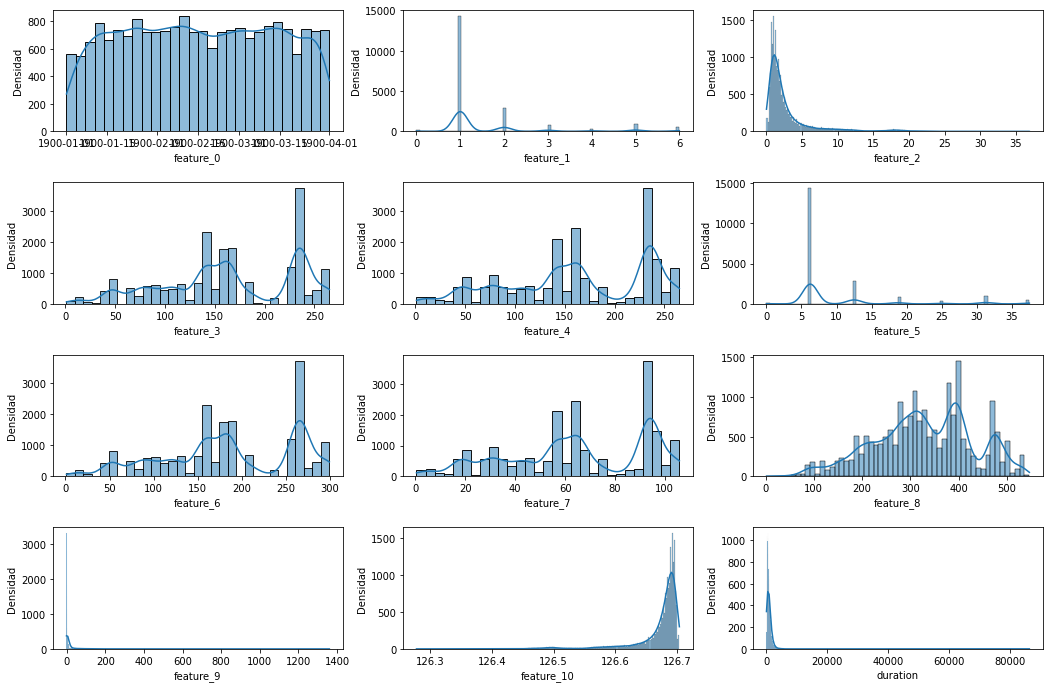

In [33]:
# Detección de variables con distribuciones significativamente anormales

variables = uber_data.drop('id', axis=1).columns
num_cols = 3
num_filas = (len(variables) - 1) // num_cols + 1
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3)


for i, variable in enumerate(variables):
    fila = i // num_cols
    col = i % num_cols
    ax = axes[fila, col]
    sns.histplot(uber_data[variable], kde=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')

plt.show()


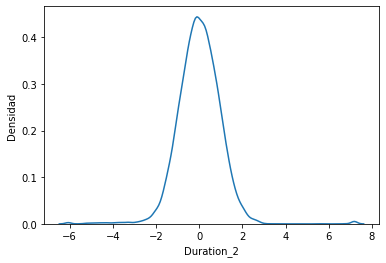

In [36]:
# Corrección de anormalidad en mediante power transfrom

uber_data['duration_2'] = PowerTransformer(method='yeo-johnson').fit_transform(uber_data[['duration']])

sns.kdeplot(uber_data['duration_2'])
plt.xlabel('Duration_2')
plt.ylabel('Densidad')
plt.show()

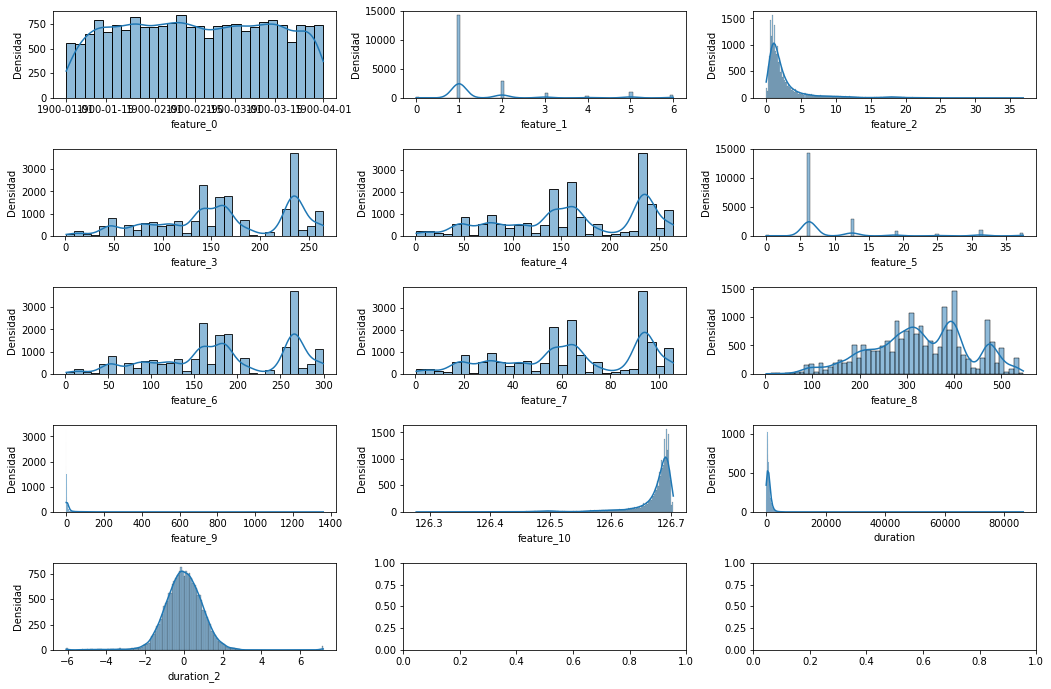

In [37]:
variables = uber_data.drop('id', axis=1).columns
num_cols = 3
num_filas = (len(variables) - 1) // num_cols + 1
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3)


for i, variable in enumerate(variables):
    fila = i // num_cols
    col = i % num_cols
    ax = axes[fila, col]
    sns.histplot(uber_data[variable], kde=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')

plt.show()


<h2 id="p_1_2">Pregunta 2</h2>

Crear nuevas características (features) que puedan mejorar
el poder predictivo del modelo

<h2 id="p_1_3">Pregunta 3</h2>

Seleccionar las características más relevantes para predecir la duración del viaje. Utilizar técnicas de selección de características basadas en una sola variable o SelectFromModel. Evitar Recursive feature elimination debido a su alto coste computacional

In [2]:
#Ver : (https://scikit-learn.org/stable/modules/feature_selection.html)

<h2 id="p_1_4">Pregunta 4</h2>

Entrenar un modelo sencillo como base y medir su MAPE (Mean Absolute Percentage Error) en el conjunto de test. Luego, elegir y entrenar dos modelos más avanzados (por ejemplo, ensambladores, máquinas de soporte vectorial, modelos bayesianos, redes neuronales) y comparar sus MAPEs

<h2 id="p_1_5">Pregunta 5</h2>

Optimizar los hiperparámetros de los dos últimos modelos utilizando validación cruzada (cross-validation) y comparar sus MAPEs. Elegir el mejor modelo basándose en estos resultados

## Parte 2

Twitter se ha convertido en un importante canal de comunicación en tiempos de emergencia.

La ubicuidad de los teléfonos inteligentes permite a las personas anunciar una emergencia que están observando en tiempo real. Debido a esto, más agencias están interesadas en monitorear programáticamente Twitter (es decir, organizaciones de ayuda en casos de desastre y agencias de noticias). Pero no siempre está claro si las palabras de una persona en realidad anuncian un desastre, ya que muchas veces se puede hablar de forma irónica o metafórica. Es por eso que se pide crear un modelo que pueda decidir si un mensaje de twitter hace referencia a una emergencia o no.

Para ello se adjunta el conjunto de datos: twitter_emergency.csv

<h2 id="p_2_1">Pregunta 1</h2>

Extraer los embeddings del texto de los tweets utilizando un modelo pre-entrenado de Huggingface

<h2 id="p_2_2">Pregunta 2</h2>

rear y entrenar una pequeña red neuronal que utilice los embeddings, la palabra clave (keyword) y la ubicación (location) para predecir si un tweet está relacionado con una emergencia o no. Gestionar los valores faltantes y agrupar las ariables categóricas de manera adecuada. No es necesario realizar una optimización de hiperparámetros exhaustiva, pero se pueden realizar ajustes si se desea

In [3]:
# NOTA: Si no se ha podido calcular los embeddings del ejercicio anterior, usar los que aparecen guardados como numpy.array en el fichero
